# CLASSIFIER
_______________________________________

## IMPORTS

In [1]:
import tensorflow as tf
import os 
import pandas as pd
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


## READING THE DATA

In [2]:
training_df  = pd.read_csv('./Training_set.csv')
training_df.head()

,filename,label
0,Image_1.jpg,six of clubs
1,Image_2.jpg,queen of hearts
2,Image_3.jpg,seven of diamonds
3,Image_4.jpg,six of spades
4,Image_5.jpg,eight of spades


*PLANNING-*
if we train one model we'll have to classify  52 cards + 1 joker  cards.
this results in 53 classes.
therefore we'll train two models - one for finding the number on the card and one for finding the shape on the card.

we'll split the label column into two target columns faec_on card and number_on_card

we use the split function to extract this information

In [3]:
def find_card_face(card):
    card_split = card.split()
    if(len(card_split) == 1):
         return card_split[0]
    else:
        return card_split[2]


In [4]:
number_on_Card_list = [i.split()[0] for i in training_df.loc[:, 'label']]
number_on_Card_list

['six',
 'queen',
 'seven',
 'six',
 'eight',
 'king',
 'ten',
 'jack',
 'three',
 'queen',
 'jack',
 'six',
 'eight',
 'seven',
 'eight',
 'two',
 'queen',
 'jack',
 'seven',
 'seven',
 'six',
 'jack',
 'ten',
 'queen',
 'six',
 'jack',
 'nine',
 'ten',
 'seven',
 'eight',
 'ace',
 'six',
 'four',
 'ten',
 'joker',
 'six',
 'nine',
 'five',
 'three',
 'four',
 'six',
 'ten',
 'seven',
 'jack',
 'seven',
 'six',
 'king',
 'six',
 'two',
 'nine',
 'two',
 'seven',
 'nine',
 'ten',
 'nine',
 'king',
 'queen',
 'ace',
 'eight',
 'queen',
 'seven',
 'ace',
 'five',
 'six',
 'two',
 'jack',
 'seven',
 'seven',
 'two',
 'ace',
 'five',
 'ace',
 'two',
 'four',
 'five',
 'ten',
 'nine',
 'seven',
 'two',
 'seven',
 'three',
 'five',
 'queen',
 'seven',
 'two',
 'jack',
 'two',
 'three',
 'eight',
 'nine',
 'jack',
 'jack',
 'five',
 'nine',
 'six',
 'nine',
 'jack',
 'king',
 'five',
 'ace',
 'six',
 'queen',
 'jack',
 'jack',
 'five',
 'five',
 'ten',
 'nine',
 'six',
 'eight',
 'six',
 'two

In [5]:
face_on_Card_list = [find_card_face(card) for card in training_df.loc[:, 'label']]
face_on_Card_list

['clubs',
 'hearts',
 'diamonds',
 'spades',
 'spades',
 'hearts',
 'spades',
 'diamonds',
 'clubs',
 'spades',
 'clubs',
 'clubs',
 'clubs',
 'diamonds',
 'clubs',
 'diamonds',
 'diamonds',
 'hearts',
 'clubs',
 'spades',
 'diamonds',
 'diamonds',
 'hearts',
 'diamonds',
 'spades',
 'hearts',
 'spades',
 'spades',
 'hearts',
 'spades',
 'spades',
 'diamonds',
 'diamonds',
 'diamonds',
 'joker',
 'clubs',
 'clubs',
 'hearts',
 'spades',
 'spades',
 'spades',
 'clubs',
 'clubs',
 'hearts',
 'spades',
 'diamonds',
 'spades',
 'diamonds',
 'spades',
 'diamonds',
 'spades',
 'hearts',
 'hearts',
 'clubs',
 'hearts',
 'spades',
 'hearts',
 'diamonds',
 'clubs',
 'spades',
 'spades',
 'spades',
 'hearts',
 'diamonds',
 'diamonds',
 'diamonds',
 'diamonds',
 'clubs',
 'clubs',
 'clubs',
 'clubs',
 'diamonds',
 'hearts',
 'diamonds',
 'spades',
 'spades',
 'diamonds',
 'diamonds',
 'spades',
 'clubs',
 'diamonds',
 'spades',
 'diamonds',
 'clubs',
 'hearts',
 'hearts',
 'diamonds',
 'spades',


In [6]:
training_df['card_face'] = face_on_Card_list
training_df['card_number'] = number_on_Card_list

In [7]:
training_df.head()

,filename,label,card_face,card_number
0,Image_1.jpg,six of clubs,clubs,six
1,Image_2.jpg,queen of hearts,hearts,queen
2,Image_3.jpg,seven of diamonds,diamonds,seven
3,Image_4.jpg,six of spades,spades,six
4,Image_5.jpg,eight of spades,spades,eight


## Extracting the images.

In [8]:
path = './data/train/'
img_list = []

for filename in training_df['filename']:
    img = cv.imread(os.path.join(path, filename))
    img_list.append(img)


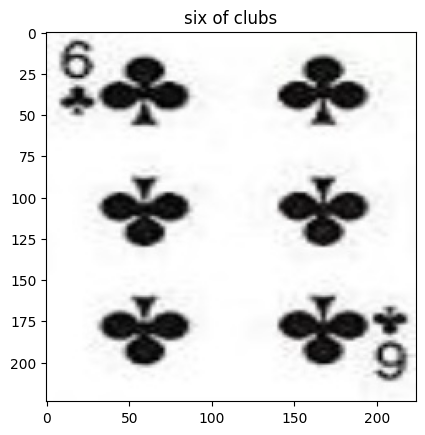

In [9]:
plt.imshow(img_list[0])
plt.title(training_df['label'][0])
plt.show()

## encoding the target variables

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

training_df['face_encoded'] = le.fit_transform(training_df['card_face'])
training_df['number_encoded'] = le.fit_transform(training_df['card_number'])

training_df.head()

,filename,label,card_face,card_number,face_encoded,number_encoded
0,Image_1.jpg,six of clubs,clubs,six,0,10
1,Image_2.jpg,queen of hearts,hearts,queen,2,8
2,Image_3.jpg,seven of diamonds,diamonds,seven,1,9
3,Image_4.jpg,six of spades,spades,six,4,10
4,Image_5.jpg,eight of spades,spades,eight,4,1


finding what value is assigned to what

In [11]:
# face encoding
df_label_face = training_df.loc[:, ['card_face', 'face_encoded']]
df_label_face = df_label_face.sort_values(by = 'face_encoded').drop_duplicates(subset = ['card_face'], keep = 'first')
df_label_face

,card_face,face_encoded
0,clubs,0
3416,diamonds,1
4532,hearts,2
2671,joker,3
4147,spades,4


In [12]:
# number encoding
df_label_number = training_df.loc[:, ['card_number', 'number_encoded']]
df_label_number = df_label_number.sort_values(by = 'number_encoded').drop_duplicates(subset = ['card_number'], keep = 'first')
df_label_number

,card_number,number_encoded
2077,ace,0
1813,eight,1
3889,five,2
355,four,3
2702,jack,4
4272,joker,5
3956,king,6
549,nine,7
2625,queen,8
2988,seven,9


In [13]:
X = np.array(img_list)
Y_face = np.array(training_df['face_encoded'].tolist())
Y_number = np.array(training_df['number_encoded'].tolist())

Normalising the image matrix to 0-1 value range

In [14]:
X = X/255

In [15]:
X

array([[[[0.95686275, 0.95686275, 0.95686275],
         [0.95686275, 0.95686275, 0.95686275],
         [0.97254902, 0.97254902, 0.97254902],
         ...,
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.99215686]],

        [[0.95686275, 0.95686275, 0.95686275],
         [0.96078431, 0.96078431, 0.96078431],
         [0.97254902, 0.97254902, 0.97254902],
         ...,
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.99215686]],

        [[0.97254902, 0.97254902, 0.97254902],
         [0.96862745, 0.96862745, 0.96862745],
         [0.97647059, 0.97647059, 0.97647059],
         ...,
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.99215686]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [16]:
print(len(X))
print(len(Y_face))
print(len(Y_number))

4776
4776
4776


In [17]:
print(X.shape)
print(Y_face.shape)

(4776, 224, 224, 3)
(4776,)


## BUILDING THE MODEL

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [19]:
from tensorflow.keras import models, layers


In [20]:
# model = Sequential([
#     Conv2D(32, (3,3), activation = "relu",input_shape =(224,224,3)),
#     MaxPooling2D((2,2)),
#     Conv2D(32, (3,3), activation = "relu"), 
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(64, activation = "relu"),
#     Dense(4, activation = "sigmoid")
# ])

In [21]:
# ann = models.Sequential([
#         layers.Flatten(input_shape=(224,224,3)),
#         layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         layers.Dense(5, activation='softmax')    
#     ])

# ann.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# ann.fit(X, Y_face, epochs = 5)

In [22]:
cnn_model  = Sequential()
cnn_model.add(Conv2D(64,(3,3), activation="relu"))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64, (3,3), activation="relu"))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, input_shape= X[1:], activation="relu"))
cnn_model.add(Dense(5, activation="softmax"))

In [23]:
cnn_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [24]:
cnn_model.fit(X, Y_face, validation_split=0.1, epochs=5)

Epoch 1/5
135/135 [==============================] - 260s 2s/step - loss: 1.5561 - accuracy: 0.4791 - val_loss: 0.9507 - val_accuracy: 0.5941
Epoch 2/5
135/135 [==============================] - 238s 2s/step - loss: 0.6319 - accuracy: 0.7401 - val_loss: 0.7221 - val_accuracy: 0.7594
Epoch 3/5
135/135 [==============================] - 238s 2s/step - loss: 0.2804 - accuracy: 0.9000 - val_loss: 0.8594 - val_accuracy: 0.7406
Epoch 4/5
135/135 [==============================] - 249s 2s/step - loss: 0.1335 - accuracy: 0.9642 - val_loss: 0.9847 - val_accuracy: 0.7824
Epoch 5/5
135/135 [==============================] - 231s 2s/step - loss: 0.0975 - accuracy: 0.9774 - val_loss: 1.0603 - val_accuracy: 0.7699


In [25]:
cnn_model_number= Sequential()
cnn_model_number.add(Conv2D(64,(3,3), activation="relu"))
cnn_model_number.add(MaxPooling2D((2,2)))
cnn_model_number.add(Conv2D(64, (3,3), activation="relu"))
cnn_model_number.add(MaxPooling2D((2,2)))

cnn_model_number.add(Flatten())
cnn_model_number.add(Dense(128, input_shape= X[1:], activation="relu"))
cnn_model_number.add(Dense(14, activation="softmax"))

In [26]:
cnn_model_number.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [27]:
cnn_model_number.fit(X, Y_number, validation_split=0.1, epochs=8)

Epoch 1/8
135/135 [==============================] - 243s 2s/step - loss: 2.0218 - accuracy: 0.4739 - val_loss: 1.1383 - val_accuracy: 0.6883
Epoch 2/8
135/135 [==============================] - 235s 2s/step - loss: 0.7684 - accuracy: 0.7785 - val_loss: 1.0298 - val_accuracy: 0.7134
Epoch 3/8
135/135 [==============================] - 232s 2s/step - loss: 0.2737 - accuracy: 0.9216 - val_loss: 1.1600 - val_accuracy: 0.7218
Epoch 4/8
135/135 [==============================] - 232s 2s/step - loss: 0.1150 - accuracy: 0.9714 - val_loss: 1.3212 - val_accuracy: 0.7134
Epoch 5/8
135/135 [==============================] - 232s 2s/step - loss: 0.0896 - accuracy: 0.9842 - val_loss: 1.3251 - val_accuracy: 0.7280
Epoch 6/8
135/135 [==============================] - 232s 2s/step - loss: 0.0428 - accuracy: 0.9942 - val_loss: 1.4194 - val_accuracy: 0.7552
Epoch 7/8
135/135 [==============================] - 232s 2s/step - loss: 0.0431 - accuracy: 0.9923 - val_loss: 1.5103 - val_accuracy: 0.7615
Epoch 

making a maping from the the encoding to the label

In [28]:
print(df_label_face.head())
print(df_label_number.head())

     card_face  face_encoded
0        clubs             0
3416  diamonds             1
4532    hearts             2
2671     joker             3
4147    spades             4
     card_number  number_encoded
2077         ace               0
1813       eight               1
3889        five               2
355         four               3
2702        jack               4


In [29]:
face_dict = {}
for index in df_label_face.index:
    face_dict[df_label_face['face_encoded'][index]] = df_label_face['card_face'][index]

print(face_dict)

number_dict = {}
for index in df_label_number.index:
    number_dict[df_label_number['number_encoded'][index]] = df_label_number['card_number'][index]

print(number_dict)


{0: 'clubs', 1: 'diamonds', 2: 'hearts', 3: 'joker', 4: 'spades'}
{0: 'ace', 1: 'eight', 2: 'five', 3: 'four', 4: 'jack', 5: 'joker', 6: 'king', 7: 'nine', 8: 'queen', 9: 'seven', 10: 'six', 11: 'ten', 12: 'three', 13: 'two'}


predicting the values

one instance prediction

1/1 [==============================] - 0s 90ms/step
four diamonds


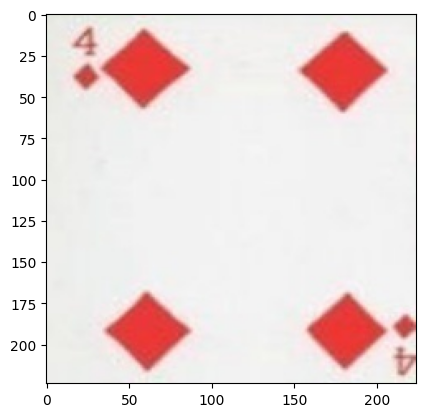

In [30]:
test_img = plt.imread('./data/test/Image_4.jpg')
plt.imshow(test_img)

test_img = test_img.reshape((1, 224, 224, 3))

face_pred = cnn_model.predict(test_img)
idx = face_pred.tolist()[0].index(1.0)
face = face_dict.get(idx)

num_pred = cnn_model_number.predict(test_img)
number = number_dict.get( num_pred.tolist()[0].index(1.0))
print(number, face)

In [31]:
df_label_face

,card_face,face_encoded
0,clubs,0
3416,diamonds,1
4532,hearts,2
2671,joker,3
4147,spades,4


In [32]:
df_label_number

,card_number,number_encoded
2077,ace,0
1813,eight,1
3889,five,2
355,four,3
2702,jack,4
4272,joker,5
3956,king,6
549,nine,7
2625,queen,8
2988,seven,9


loading the testing data

In [33]:
testing_df = pd.read_csv('./Testing_set.csv')
testing_df.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [34]:
test_images = []
path = './data/test/'
for  filename in testing_df['filename']:
    img = cv.imread(os.path.join(path, filename))
    test_images.append(img)

test_images = np.array(test_images)

In [35]:
def find_card(img):
    face  = ""
    number = ""

    img = img.reshape(1, 224, 224, 3)
    
    face_pred = cnn_model.predict(img)
    try:
        idx = face_pred.tolist()[0].index(1.0)
    except:
        idx = 0
    face = face_dict.get(idx)

    num_pred = cnn_model_number.predict(img)
    try:
        number = number_dict.get( num_pred.tolist()[0].index(1.0))
    except:
        number = number_dict.get(0)
    if(number == 'joker' or face == 'joker'):
        return 'joker'
    else:
        return "" + number + " of " + face + ""
   

        



    


In [36]:

find_card(test_images[3])

1/1 [==============================] - 0s 39ms/step


'four of hearts'

In [37]:
test_copy = testing_df
test_copy.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [38]:
test_label_list = []
for img in test_images:
    test_label_list.append(find_card(img))

1/1 [==============================] - 0s 43ms/step


In [39]:
test_label_list

['six of spades',
 'ace of spades',
 'eight of diamonds',
 'four of hearts',
 'three of clubs',
 'four of diamonds',
 'jack of clubs',
 'jack of diamonds',
 'jack of diamonds',
 'queen of clubs',
 'jack of diamonds',
 'six of diamonds',
 'jack of spades',
 'king of hearts',
 'queen of spades',
 'three of hearts',
 'four of clubs',
 'five of hearts',
 'nine of spades',
 'queen of spades',
 'king of clubs',
 'eight of hearts',
 'eight of clubs',
 'jack of hearts',
 'king of diamonds',
 'three of hearts',
 'jack of hearts',
 'two of hearts',
 'nine of hearts',
 'king of hearts',
 'ace of hearts',
 'queen of diamonds',
 'ten of diamonds',
 'jack of clubs',
 'three of hearts',
 'jack of diamonds',
 'nine of clubs',
 'jack of spades',
 'joker',
 'two of hearts',
 'three of diamonds',
 'four of clubs',
 'ace of diamonds',
 'four of diamonds',
 'queen of spades',
 'ace of diamonds',
 'four of diamonds',
 'two of hearts',
 'two of spades',
 'queen of spades',
 'three of diamonds',
 'four of dia

In [40]:
testing_df['label'] = test_label_list

In [43]:
testing_df.head(10).to_csv()

,filename,label
0,Image_1.jpg,six of spades
1,Image_2.jpg,ace of spades
2,Image_3.jpg,eight of diamonds
3,Image_4.jpg,four of hearts
4,Image_5.jpg,three of clubs
5,Image_6.jpg,four of diamonds
6,Image_7.jpg,jack of clubs
7,Image_8.jpg,jack of diamonds
8,Image_9.jpg,jack of diamonds
9,Image_10.jpg,queen of clubs
